# Wykrywanie Zaburzeń Sygnału EKG

![ECG_anomaly_detection_intro.png](https://live.staticflickr.com/65535/54253200317_77c251c48c_o.png)

*Obraz wygenerowany przy użyciu modelu DALL-E.*

## Wstęp

Rozwój sztucznej inteligencji otwiera nowe możliwości w diagnostyce medycznej, zwłaszcza w analizie złożonych danych, takich jak [sygnały elektrokardiograficzne (EKG)](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-interpretation-tutorial). EKG to jedno z najczęściej stosowanych narzędzi diagnostycznych w medycynie, umożliwiające ocenę i wykrywanie nieprawidłowości pracy serca.

Tradycyjnie sygnał EKG powstaje z dwunastu odprowadzeń, jednak w tym zadaniu skupimy się na sygnale jednoodprowadzeniowym, czyli dysponujemy
jedną zmienną reprezentującą napięcie elektryczne generowane przez serce w czasie. Dane te są rejestrowane w postaci krzywej zależnej od czasu, czyli można tutaj mówić o szeregu czasowym. Z sygnału EKG można wydzielić charakterystyczne fragmenty, czyli **załamki** (ang. waves) P, Q, R, S, T oraz **odstępy** pomiędzy dwoma zdarzeniami w EKG (ang. intervals), spośród których istotną rolę odgrywa odstęp R-R (czas między wystąpieniem dwóch kolejnych załamków R). Oprócz tego mówimy o **odcinkach** (ang. segments), czyli długości między dwoma określonymi załamkami w EKG, pomiędzy którymi powinna występować bazowa amplituda sygnału. Z kolei **zespół** (ang. complex) stanowi kilka zgrupowanych załamków. Głównie wyrózniamy tutaj zespół QRS. Schematyczny rysunek EKG wraz z podpisanymi fragmentami, jest prezentowany poniżej.

![ECG.png](https://live.staticflickr.com/65535/54254099351_213d47784d_o.png)

W EKG pochodzącym od zdrowej osoby można zauważyć sekwencję PQRST. Na początku wyróżniamy załamek P, która reprezentuje skurcz przedsionków i jest małym pionowym wychyleniem przed zespołem QRS. Następnie, zespół QRS wskazuje na skurcz komór i tworzony jest przez trzy wygięcia: załamek Q, załamek R oraz załamek S. Dalej można zauważyć odcinek ST, czyli płaski odcinek między zespołem QRS a załamkiem T, który odpowiada wczesnej fazie repolaryzacji komór. Finalnie, załamek T, który jest zaokrąglonym, pionowym wychyleniem, dotyczy repolaryzacji komór i ich powrotu do wyjściowego stanu.  Sekwencja PQRST przypomina sinusoidę, której maksimum jest osiągane dla załamka R. W przypadku zaburzeń pracy serca, EKG może wykazywać różne anomalie, takie jak dodatkowe minima lub maksima, czy też znacznie zwiększone odchylenie standardowe podczas całego pomiaru. Charakterystyka tych anomalii zależy od rodzaju i przyczyny zaburzenia.

W poniższym zadaniu musisz zmierzyć się z próbkami zawierającymi pojedyncze sekwencje PQRST oraz ich okolice. Większość próbek będzie odpowiadała danym bez anomalii, których przykład zaprezentowany jest na poniższym obrazku:

![normal_example.png](https://live.staticflickr.com/65535/54253200322_f0173af129_o.png)

Występować będą też pomiary odpowiadające czterem rodzajom zaburzeń:  **AFib**, czyli migotaniu przedsionków, **PAC**, czyli przedwczesnemu pobudzeniu przedsionkowemu, **PVC**, czyli przedwczesnym skurczom komorowym oraz **STEMI**, czyli zawałowi mięśnia sercowego z uniesieniem odcinka ST.

**UWAGA**: Poniższe dane są danymi syntetycznymi i są tylko pewnym przybliżeniem rzeczywistych danych EKG!

EKG jest typowym przykładem szeregu czasowego, który można analizować za pomocą dedykowanych metod uczenia maszynowego, w tym sieci neuronowych, np. sieci rekurencyjnych. Jednak nie zawsze wykorzystanie sieci neuronowych jest konieczne, a nawet wskazane. W przypadku niektórych problemów satysfakcjonujące wyniki można uzyskać za pomocą prostszych metod, gdzie kluczowe jest odpowiednie przygotowanie danych. Ich umiejętna analiza pozwala na selekcję kliku metacech - cech zwięźle opisujących próbki ze zbioru danych, np. średniej, minimum, maksimum, odchylenia standardowego, itp. Mogą być one wykorzystane do klasyfikacji zamiast oryginalnych cech. Dzięki temu korzystamy z niskowymiarowych danych wejściowych, przykładowo redukujemy 150-wymiarowy wektor zawierający informacje z oryginalnych kroków czasowych do wektora 4-wymiarowego zawierającego specjalnie przygotowane cechy.

Przykładem zastosowania niewielkiej liczby metacech są modele uczenia maszynowego, które mają działać na urządzeniach wbudowanych lub małych urządzeniach mobilnych, gdzie kluczowe są takie ograniczenia, jak wymóg niskiego poboru energii, mała ilość dostępnej pamięci operacyjnej czy ograniczona moc obliczeniowa. W takich przypadkach wymagane jest zastosowanie prostszych modeli, które są w stanie zapewnić odpowiednią dokładność klasyfikacji przy jednoczesnym zachowaniu wymaganych ograniczeń.

## Zadanie

Przygotuj rozwiązanie (wraz z wytrenowaniem modelu lasu losowego), które spełni wymagania naszego urządzenia wbudowanego. Przeanalizuj dane i przygotuj zestaw **4 metacech**, które dadzą najlepszą zrównoważoną dokładność (ang. *balanced accuracy*) dla problemu klasyfikacji sygnałów EKG. Zbiór danych składa się ze zbioru treningowego oraz walidacyjnego (wraz z etykietami), na którym możesz weryfikować swoje podejście. Twoje rozwiązanie będzie sprawdzane na osobnym (tajnym) zbiorze testowym, w którym liczba obserwacji będzie się różnić od liczby obserwacji w zbiorach treningowym i walidacyjnym. Każda próbka jest opisana 150 wartościami odpowiadającymi kolejnym krokom czasowym oraz jest przypisana do jednej z pięciu następujących klas:

| ID klasy  | Nazwa klasy   | Opis  | Próbki w zbiorze treningowym | Próbki w zbiorze walidacyjnym |
| ------    | ------        | ----  | ---------------------------- | ----------------------------- |
| 0         | normal        | brak anomalii | 1400 | 819 |
| 1         | afib          | Atrial Fibrillation (migotanie przedsionków)| 150 | 142 |
| 2         | pac           | Premature Atrial Contractions (przedwczesne pobudzenie przedsionkowe)| 150 | 191 |
| 3         | pvc           | Premature Ventricular Complex (przedwczesne skurcze komorowe)| 150 | 197 |
| 4         | st_elevation  | ST-elevation myocardial infarction (zawał mięśnia sercowego z uniesieniem odcinka ST) | 150 | 151 |

Nowe cechy powinny zawierać kluczowe informacje diagnostyczne róznicujące powyższe klasy, które pozwolą na skuteczną klasyfikację wymienionych anomalii.

Klasyfikatorem dla tego zadania jest [las losowy](https://pl.wikipedia.org/wiki/Las_losowy) z liczbą drzew decyzyjnych nie większą niż 10 oraz maksymalną głębokością 10. **Rozwiązania niespełniające tych warunków będą dyskwalifikowane!** W przypadku innych parametrów lasu nie ma ograniczeń. Dozwolony jest także preprocessing, czyli wstępne przetwarzanie danych wejściowych (np. zastosowanie normalizacji danych).

### Kryterium Oceny

Twoje rozwiązanie oceniane będzie na tajnym zbiorze testowym na podstawie [zrównoważonej dokładności klasyfikacji (balanced accuracy)](https://scikit-learn.org/dev/modules/generated/sklearn.metrics.balanced_accuracy_score.html):

$$\text{score}(balanced\_accuracy) = 
\begin{cases} 
    0 &\quad \text{jeżeli }  balanced\_accuracy \leq 75 \% \\
    100 &\quad \text{jeżeli }  balanced\_accuracy \geq 98 \% \\
    \dfrac{balanced\_accuracy - 75 \%}{98 \% - 75 \%} &\quad \text{w pozostałych przypadkach}
\end{cases}$$

Oznacza to, że wszystkie rozwiązania, które na zbiorze testowym uzyskają do $75\%$ zrównoważonej dokładności klasyfikacji, otrzymają $0$ punktów, zaś co najmniej $98\%$ zrównoważonej dokładności klasyfikacji, uzyskają maksymalną liczbę punktów za zadanie. Wszystkie zaś wartości z przedziału $75-98\%$ zostaną zamienione na liczbę punktów (między $0$ a $100$) zgodnie z powyższym wzorem.

*Wskazówka*: Twoim wyznacznikiem jakości proponowanego rozwiązania powinien być wynik na zbiorze walidacyjnym.

W zagadnieniach dot. wykrywania chorób dość często mamy do czynienia z niezrównoważonym (niezbalansowanym) zbiorem danych. Chodzi o to, że zazwyczaj wśród danych dominują przykłady *normalne*, odpowiadające osobom zdrowym, a próbki reprezentujące osoby chore zwykle należą do mniejszości. Wyobraźmy sobie sytuację, w której na 100 próbek jedynie 10 dotyczy osób chorych, a pozostałe 90 zdrowych. Wówczas model, który każdej próbce przyporządkowywałby klasę *zdrowy*, osiągnąłby 90% dokładności klasyfikacji, lecz jedynie 50% zrównoważonej dokładności klasyfikacji! Oczywiście taki model byłby bezużyteczny. W takich przypadkach potrzebujemy miary, która lepiej odpowiada potrzebom wynikającym z postawionego problemu i informuje o skuteczności modelu w sposób użyteczny z punktu widzenia jego późniejszego użytkownika.

W tym zadaniu musisz się więc skupić się na tym, by każda z klas była przyporządkowywana prawidłowo.

## Ograniczenia
- Twoje rozwiazanie będzie testowane na Platformie Konkursowej bez dostępu do internetu oraz w środowisku bez GPU.
- Ewaluacja Twojego finalnego rozwiązania na Platformie Konkursowej nie może trwać dłużej niż 1 minutę bez GPU.
- Podczas przygotowania danych należy pamiętać o tym, że:
    - zakazane jest korzystanie z innych niż lasy losowe metod uczenia maszynowego, zarówno nadzorowanego jak i nienadzorowanego (np. autokodery, wielowarstwowe perceptrony i inne sieci neuronowe, maszyny wektorów nośnych (SVM), i inne), dozwolone są jednak metody redukcji wymiarowości, w stylu analizy składowych głównych (PCA);
    - przy konstrukcji metacech można korzystać wyłącznie z funkcji dostępnych standardowo w Pythonie (`v3.11`), a także Numpy (`v2.0.2`) oraz Scipy (`v1.14.1`);
    - można wyznaczyć maksymalnie 4 metacechy,
- Do klasyfikacji można wykorzystać wyłącznie [las losowy (RandomForestClassifier) z biblioteki scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (`v1.5.2`):
    - złożony z maksymalnie 10 drzew decyzyjnych (`n_estimators` $\leq 10$);
    - każde drzewo ma mieć maksymalną głębokość równą 10 (`max_depth` $\leq 10$);
    - pozostałe hiperparametry można modyfikować bez ograniczeń;

## Pliki Zgłoszeniowe
Ten notebook uzupełniony o Twoje rozwiązanie (patrz klasa `YourSolution`), w którym przygotujesz zestaw 4 metacech opisujących zbiór danych oraz zestaw hiperparametrów lasu losowego.

## Ewaluacja
Pamiętaj, że podczas sprawdzania flaga `FINAL_EVALUATION_MODE` zostanie ustawiona na `True`.

Za to zadanie możesz zdobyć pomiędzy 0 a 100 punktów. Liczba punktów, którą zdobędziesz, będzie wyliczona na (tajnym) zbiorze testowym na Platformie Konkursowej na podstawie wyżej wspomnianego wzoru, zaokrąglona do liczby całkowitej. Jeśli Twoje rozwiązanie nie będzie spełniało powyższych kryteriów lub nie będzie wykonywać się prawidłowo, otrzymasz za zadanie 0 punktów.

---

## Informacje Uzupełniające

### Zrównoważona Dokładność Klasyfikacji

Niech $C$ będzie liczbą klas, a $N_j$ odpowiada ilości próbek należących do $j$-tej klasy, gdzie $j \in \lbrace 1, ..., C \rbrace$. Ponadto, niech $\hat{y}_{i,j}$ będzie przewidywaną przez model klasą dla $j$-tej próbki należącej w rzeczywistości do $i$-tej klasy. Wówczas zrównoważoną (zbalansowaną) dokładność klasyfikacji możemy wyliczyć następująco:

$$
balanced\_accuracy = \dfrac{1}{C} \sum\limits_{i=1}^{C} \sum\limits_{j=1}^{|N_c|} \dfrac{1}{|N_c|} \cdot \mathbf{1} \left( \hat{y}_{i, j} = i \right),
$$

gdzie $\mathbf{1} \left( \hat{y}_{i, j} = i \right)$ jest funkcją indykatorową, która przyjmuje wartość 1, jeśli $\hat{y}_{i, j} = i$, czyli w sytuacji, w której klasa przewidywana dla $j$-tej próbki jest taka sama jak rzeczywista klasa tej próbki oraz 0 w przeciwnym przypadku. Suma zewnętrzna przebiega po kolejnych klasach, a wewnętrzna po kolejnych próbkach należących do danej klasy.

**Przykład**: Niech
$$\mathbf{y} = [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3]$$

będzie wektorem reprezentującym rzeczywiste klasy dla kolejnych próbek, a

$$\mathbf{\hat{y}} = [0, 0, 0, 0, 0, 2, 2, 2, 2, 3, 3, 3]$$

wektorem reprezentującym predykcje modelu dla tychże próbek. Mamy więc do czynienia z czterema klasami, gdzie model miał problem z klasą o numerze $1$. Wszystkie pozostałe przykłady zostały przypisane bezbłędnie. Łącznie 10 na 12 próbek zostało sklasyfikowanych prawidłowo, co oznacza, że gdybyśmy mieli mierzyć "zwykłą" dokładność klasyfikacji, otrzymalibyśmy ok. $83.3\%$ . Jednak gdy przyjrzymy się zbalansowanej dokładności klasyfikacji, otrzymamy wynik $75\%$.

Załóżmy teraz, że

$$\mathbf{\hat{y}} = [0, 0, 0, 1, 0, 2, 2, 2, 2, 3, 3, 3]$$

czyli model klasyfikuje poprawnie $50\%$ próbek z klasy 1 oraz $100\%$ próbek z pozostałych klas. "Zwykła" dokładność klasyfikacji wynosi tutaj niespełna $92\%$, podczas gdy zbalansowana dokładność klasyfikacji wynosi $87.5\%$.

### Anomalie Występujące w Rozważanym Zbiorze Danych

#### AFib
**Atrial Fibrillation (AFib)**, czyli migotanie przedsionków, występuje wtedy, gdy potencjały czynnościowe wyzwalają się bardzo szybko i chaotycznie, w związku z tym rytm serca jest nieregularny. W tym zaburzeniu załamki P mogą nie być widoczne w EKG, a zespół QRS staje się nieregularny.

![AFIB_example.png](https://live.staticflickr.com/65535/54253219357_78c51f06ff_o.png)

#### PAC
**Premature Atrial Contractions (PACs)**, czyli przedwczesne pobudzenie przedsionkowe, związane jest z nieprawidłowym załamkiem P, po którym następuje prawidłowy zespół QRS. *Uwaga!* W próbkach z zadania występują przykłady, w których w ramach jednej próbki ze zbioru danych widoczny jest jedynie przedwczesny załamek P.

![PAC_example.png](https://live.staticflickr.com/65535/54254324138_df77fdd62a_o.png)

#### PVC
**Premature Ventricular Contractions (PVCs)**, czyli przedwczesne skurcze komorowe, są dodatkowymi uderzeniami serca, które rozpoczynają się w jednej z dwóch komór serca i zakłócają jego regularny rytm. Są jednym z powszechnych rodzajów arytmii. Skurcze te zachodzą wcześniej niż byłoby to oczekiwane na podstawie poprzednich odstępów R-R.

![PVC_example.png](https://live.staticflickr.com/65535/54254518540_12ba23c53f_o.png)

#### STEMI
**ST-elevation myocardial infarction (STEMI)**, czyli zawał mięśnia sercowego z uniesieniem odcinka ST, powoduje zablokowanie przepływu krwi do mięśnia sercowego i jego obumarcie. Segment ST występuje tuż po zespole QRS. W normalnej sytuacji nie ma tam żadnej aktywności elektrycznej, przez co jest on płaski. Jeśli zaś występuje uniesienie odcinka ST, oznacza to blokadę jednej z głównych tętnic doprowadzających krew do serca.

![STEMI_example.png](https://live.staticflickr.com/65535/54254099356_422c23144e_o.png)

---

**Źródła opisu medycznego dot. EKG**: [1](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-topic-reviews-and-criteria/premature-ventricular-contractions-review), [2](https://www.mayoclinic.org/diseases-conditions/premature-ventricular-contractions/symptoms-causes/syc-20376757), [3](https://litfl.com/premature-atrial-complex-pac/), [4](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-topic-reviews-and-criteria/premature-atrial-contractions-review), [5](https://www.mayoclinic.org/diseases-conditions/atrial-fibrillation/symptoms-causes/syc-20350624), [6](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-topic-reviews-and-criteria/atrial-fibrillation-review), [7](https://my.clevelandclinic.org/health/diseases/22068-stemi-heart-attack), obraz załamków PQRST na podstawie [8](https://www.sciencedirect.com/science/article/pii/S0213911121002466).

# Kod Startowy

W tej sekcji inicjalizujemy środowisko poprzez zaimportowanie potrzebnych bibliotek i funkcji. Przygotowany kod ułatwi Tobie efektywne operowanie na danych i budowanie właściwego rozwiązania.

In [166]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

# W czasie sprawdzania Twojego rozwiązania, wartość flagi FINAL_EVALUATION_MODE zostanie zmieniona na True
FINAL_EVALUATION_MODE = False

In [167]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################
import cloudpickle

import os
import random
from abc import ABC, abstractmethod

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

In [168]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

# Ustawienie ziarna generatora liczb pseudolosowych w celu zapewnienia deterministyczności wyników.
random.seed(42)
np.random.seed(42)

## Ładowanie Danych
Za pomocą poniższego kodu wczytujemy dane.

In [169]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

train_val_filename = "train_validation_sets.npz"
if not os.path.exists(train_val_filename):
    import gdown
    url = "https://drive.google.com/file/d/1pCqgbsKBQP1UnH2kMmBKRS1AuvmSl9jx/view?usp=sharing"
    gdown.download(url, train_val_filename, quiet=True, fuzzy=True)

train_valid_bundle = np.load("train_validation_sets.npz", allow_pickle=True)
x_train = train_valid_bundle["X_train"]
y_train = train_valid_bundle["y_train"]
y_train_str = train_valid_bundle["anomaly_train"]

x_valid = train_valid_bundle["X_validation"]
y_valid = train_valid_bundle["y_validation"]
y_valid_str = train_valid_bundle["anomaly_validation"]

## Publiczny Interfejs Rozwiązania

Tylko tego wymagamy od Twojej klasy. W Twoim rozwiązaniu możesz modyfikować swoją klasę do woli dodając atrybuty oraz nowe metody obliczające metacechy - cokolwiek co będzie Ci potrzebne do rozwiązania zadania.

In [170]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

class ISolution(ABC):
    random_forest: RandomForestClassifier | None = None

    @classmethod
    def create_with_training(cls) -> "ISolution":
        """Metoda służąca do stworzenia rozwiązania z wytrenowanym lasem losowym."""
        solution = cls()

        hyperparameters = cls.get_rf_hyperparameters()
        hyperparameters = cls.validate_hyperparameters(hyperparameters)
        solution.random_forest = RandomForestClassifier(**hyperparameters)

        meta_features = solution.compute_meta_features(x_train)
        solution.random_forest.fit(meta_features, y_train)
        return solution

    @staticmethod
    def validate_hyperparameters(hyperparameters: dict[str, int | float | str]) -> dict[str, int | float | str]:
        """
        Funkcja ta sprawdza, czy hiperparametry lasu losowego są zgodne z wymaganiami zadania. Jeśli nie, to poprawia je na
        domyślne wartości.
        """
        hyperparameters["n_estimators"] = min(hyperparameters.get("n_estimators", 10), 10)
        hyperparameters["max_depth"] = min(hyperparameters.get("max_depth", 10), 10)
        hyperparameters["random_state"] = 42
        return hyperparameters

    @abstractmethod
    def compute_meta_features(self, x: np.ndarray) -> np.ndarray:
        """
        Funkcja ta powinna dla każdego przykładu ze zbioru $x$ opisanego 150 cechami zwrócić wektor 4 cech, który będzie
        reprezentował ten przykład. Funkcja ta powinna przekształcać wejściową tablicę o rozmiarze (n, 150) na tablicę o
        rozmiarze (n, 4).
        """

        pass

    @staticmethod
    @abstractmethod
    def get_rf_hyperparameters() -> dict[str, int | float | str]:
        """
        Funkcja ta powinna zwracać słownik z hiperparametrami lasu losowego. Pamiętaj o ograniczeniach na liczbę drzew i ich
        głębokość!
        """

        pass


## Kod z Kryterium Oceniającym
Kod, zbliżony do poniższego, będzie używany do oceny rozwiązania na zbiorze testowym.

In [171]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

def balanced_accuracy_to_score(balanced_accuracy: float) -> float:
    return min(max((balanced_accuracy - 75.) * (100. / (98. - 75.)), 0.), 100.)


def score_solution(solution: ISolution) -> float:
    x, y = x_valid, y_valid
    meta_features = solution.compute_meta_features(x)
    y_hat = solution.random_forest.predict(meta_features)
    balanced_accuracy = 100. * balanced_accuracy_score(y, y_hat)

    assert meta_features.shape[-1] <= 4
    assert solution.random_forest.n_estimators <= 10
    assert solution.random_forest.max_depth <= 10

    if not FINAL_EVALUATION_MODE:
        print("Ocena działania modelu: \n")
        print(f"Zbalansowana dokładność klasyfikacji: {balanced_accuracy: .4f}")
    return int(round(balanced_accuracy_to_score(balanced_accuracy)))

In [172]:
# import numpy as np
# from scipy.signal import find_peaks, peak_widths
# from scipy.stats import variation, entropy, skew
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.metrics import classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# # Temporary class for dev — skip assert limits
# class DebugSolution:
#     def compute_meta_features(self, x):
#         n = x.shape[0]
#         features = np.zeros((n, 10))  # We compute 10 features here
#         
#         for i in range(n):
#             sig = x[i]
#             norm_sig = (sig - sig.min()) / (sig.max() - sig.min() + 1e-8)
#             peaks, _ = find_peaks(sig, height=0.4, distance=20)
#             rr = np.diff(peaks)
# 
#             # Original + new features
#             features[i, 0] = variation(rr) if len(rr) > 1 else 0  # RR CV
#             features[i, 1] = entropy(norm_sig + 1e-8)              # Entropy
#             features[i, 2] = np.abs(skew(sig))                    # Skewness
#             features[i, 3] = np.std(rr) if len(rr) > 1 else 0     # RR Std
#             features[i, 4] = len(peaks)                           # Peak count
#             features[i, 5] = np.max(sig) - np.min(sig)            # Peak-to-peak amp
#             features[i, 6] = np.median(np.diff(sig))              # Median diff
#             features[i, 7] = np.percentile(sig, 90) - np.percentile(sig, 10)  # Spread
#             features[i, 8] = np.mean(np.abs(np.diff(sig)))        # Mean abs diff
#             features[i, 9] = np.max(sig[:50]) - np.median(sig[:50])  # P-wave bump
# 
#         return features
# 
# # === Load your dev data ===
# x_train, y_train = x_train, y_train
# x_valid, y_valid = x_valid, y_valid
# 
# # === Compute features ===
# model = DebugSolution()
# X_train_full = model.compute_meta_features(x_train)
# X_valid_full = model.compute_meta_features(x_valid)
# 
# # === Feature selection ===
# selector = SelectKBest(f_classif, k=4)
# X_train_sel = selector.fit_transform(X_train_full, y_train)
# X_valid_sel = selector.transform(X_valid_full)
# 
# top_features = selector.get_support(indices=True)
# print("Selected top feature indices:", top_features)
# 
# # === Train classifier ===
# clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
# clf.fit(X_train_sel, y_train)
# y_pred = clf.predict(X_valid_sel)
# 
# # === Metrics ===
# print("\n=== Classification Report ===")
# print(classification_report(y_valid, y_pred, target_names=["normal", "afib", "pac", "pvc", "st_elevation"]))
# 
# # === Confusion Matrix ===
# cm = confusion_matrix(y_valid, y_pred, normalize='true')
# plt.figure(figsize=(6, 5))
# sns.heatmap(cm, annot=True, cmap="viridis", xticklabels=["normal", "afib", "pac", "pvc", "st_elevation"],
#             yticklabels=["normal", "afib", "pac", "pvc", "st_elevation"])
# plt.title("Normalized Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.tight_layout()
# plt.show()
# 
# # === Feature Importances ===
# plt.figure(figsize=(6, 4))
# plt.bar(range(4), clf.feature_importances_)
# plt.xticks(range(4), [f'F{i}' for i in top_features])
# plt.title("Top 4 Feature Importances")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


## Przykładowe Rozwiązanie

Poniżej przedstawiamy uproszczone rozwiązanie, które służy jako przykład demonstrujący podstawową funkcjonalność notatnika. Może ono posłużyć jako punkt wyjścia do opracowania Twojego rozwiązania.

In [173]:
import numpy as np
from scipy.signal import find_peaks, peak_widths
from scipy.stats import variation, skew, entropy
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

class ExemplarySolution(ISolution):
    def __init__(self):
        self.selected_indices = None
        self.random_forest = None
        self.feature_names = [
            "RR_var", "Entropy", "Pwave_ratio", "P_early_dist",
            "QRS_width", "QRS_sharp", "ST_elev", "Skew_abs", "Peak_count"
        ]

    def compute_all_features(self, x: np.ndarray) -> np.ndarray:
        n_samples = x.shape[0]
        features = np.zeros((n_samples, 9))

        for i in range(n_samples):
            signal = x[i]
            norm_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal) + 1e-8)

            # R peaks
            peaks, _ = find_peaks(signal, height=0.4, distance=20, prominence=0.2)
            rr_intervals = np.diff(peaks) if len(peaks) >= 2 else np.array([1])

            # === AFib ===
            features[i, 0] = np.log1p(variation(rr_intervals)) if len(rr_intervals) > 1 else 0
            features[i, 1] = entropy(norm_signal + 1e-8)

            # === PAC ===
            p_region = signal[:80]
            p_peaks, p_props = find_peaks(p_region, height=0.2, prominence=0.1, width=5)
            if len(p_peaks) > 0:
                widths = peak_widths(p_region, p_peaks, rel_height=0.5)[0]
                features[i, 2] = np.mean(p_props['prominences']) / (np.mean(widths) + 1e-6)
                features[i, 3] = np.min(np.diff(p_peaks)) if len(p_peaks) > 1 else 0
            else:
                features[i, 2:4] = 0

            # === PVC ===
            qrs_peaks, _ = find_peaks(signal, height=0.5, distance=25, prominence=0.3)
            if len(qrs_peaks) > 0:
                main_peak = qrs_peaks[np.argmax(signal[qrs_peaks])]
                width = peak_widths(signal, [main_peak], rel_height=0.5)[0][0]
                features[i, 4] = width
                features[i, 5] = signal[main_peak] / (width + 1e-6)
            else:
                features[i, 4:6] = 0
                main_peak = np.argmax(signal[50:100]) + 50  # fallback

            # === ST Elevation ===
            qrs_end = main_peak + 15
            st_region = signal[qrs_end:min(len(signal), qrs_end + 20)]
            baseline = np.percentile(signal[:30], 25)
            features[i, 6] = np.percentile(st_region, 90) - baseline

            # === General ===
            features[i, 7] = np.abs(skew(signal))
            features[i, 8] = len(peaks)

        return features

    def compute_meta_features(self, x: np.ndarray) -> np.ndarray:
        full = self.compute_all_features(x)
        return full[:, self.selected_indices] if self.selected_indices is not None else full

    @staticmethod
    def get_rf_hyperparameters() -> dict[str, int | float | str]:
        return {
            "n_estimators": 10,
            "max_depth": 10,
            "min_samples_split": 3,
            "min_samples_leaf": 2,
            "max_features": 'sqrt',
            "class_weight": {0: 1, 1: 8, 2: 10, 3: 10, 4: 8},
            "random_state": 42,
            "criterion": "entropy",
            "min_impurity_decrease": 0.01,
            "bootstrap": True
        }

    @classmethod
    def create_with_training(cls):
        sol = cls()
        X, y = x_train, y_train
        full_features = sol.compute_all_features(X)

        # Initial training on all features
        rf_full = RandomForestClassifier(**sol.get_rf_hyperparameters())
        rf_full.fit(full_features, y)

        # Select top 4 features (descending importance)
        importances = rf_full.feature_importances_
        top4 = np.argsort(importances)[::-1][:4]
        sol.selected_indices = top4

        # Retrain on top 4 features
        sol.random_forest = RandomForestClassifier(**sol.get_rf_hyperparameters())
        sol.random_forest.fit(full_features[:, top4], y)

        # Display feature importances
        print("Selected features:", [sol.feature_names[i] for i in top4])
        plt.figure()
        plt.bar([sol.feature_names[i] for i in top4], importances[top4])
        plt.title("Top 4 Feature Importances")
        plt.tight_layout()
        plt.show()

        return sol


In [174]:
def plot_feature_distributions(meta_features: np.ndarray, labels: np.ndarray, class_names=None):
    n_features = meta_features.shape[1]
    n_classes = len(np.unique(labels))
    class_names = class_names or [f'Class {i}' for i in range(n_classes)]

    for i in range(n_features):
        plt.figure(figsize=(8, 4))
        for cls in range(n_classes):
            cls_mask = labels == cls
            plt.hist(meta_features[cls_mask, i], bins=30, alpha=0.6, label=class_names[cls], density=True)
        plt.title(f"Feature {i} Distribution")
        plt.xlabel(f"Feature {i}")
        plt.ylabel("Density")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


ERROR: Invalid requirement: 'classification_report,'
Selected features: ['ST_elev', 'Peak_count', 'Pwave_ratio', 'QRS_sharp']


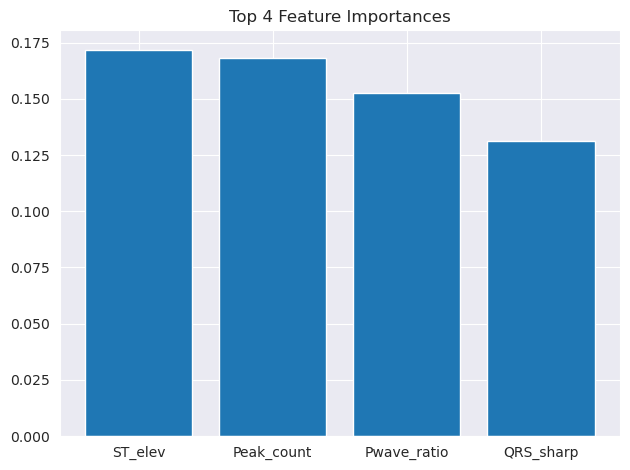

Ocena działania modelu: 

Zbalansowana dokładność klasyfikacji:  74.7856
Ocena: 0 pkt

=== Classification Report ===
              precision    recall  f1-score   support

      normal       0.88      0.85      0.86       819
        afib       0.88      0.86      0.87       142
         pac       0.56      0.65      0.60       191
         pvc       0.58      0.59      0.58       197
st_elevation       0.81      0.79      0.80       151

    accuracy                           0.78      1500
   macro avg       0.74      0.75      0.74      1500
weighted avg       0.79      0.78      0.79      1500

=== Confusion Matrix ===


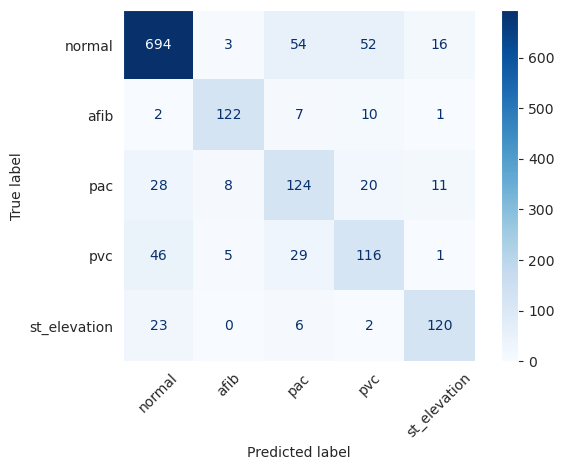

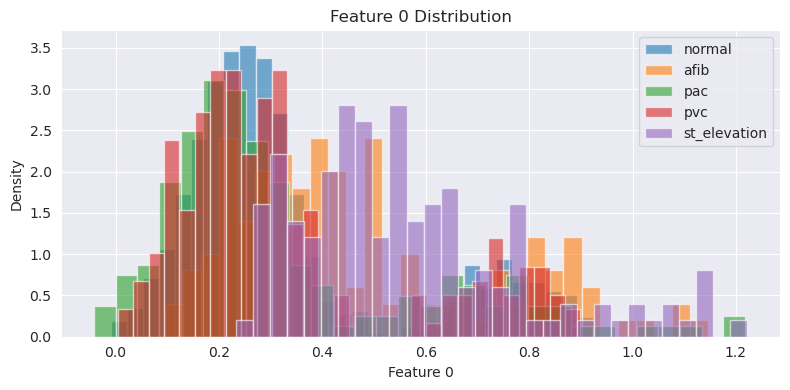

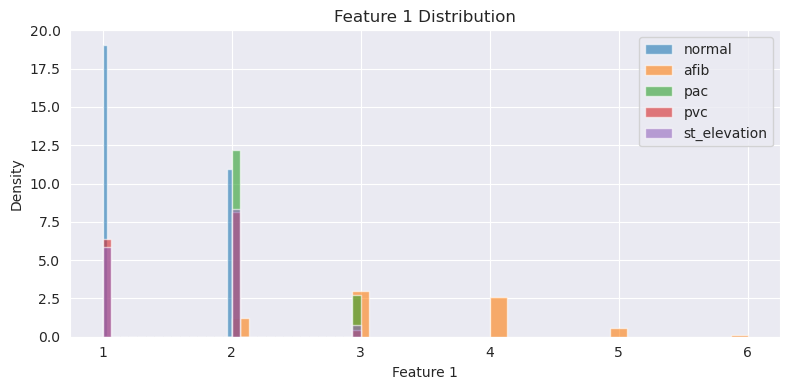

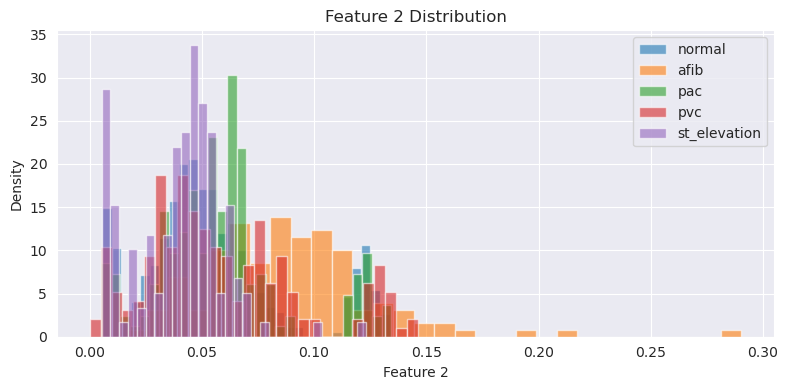

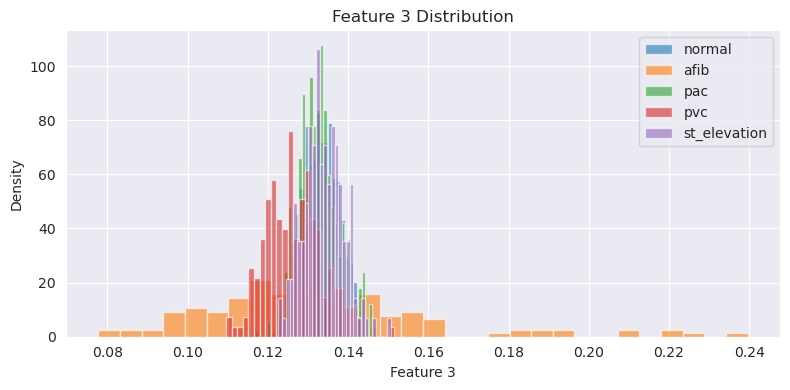

Selected features: ['ST_elev', 'Peak_count', 'Pwave_ratio', 'QRS_sharp']


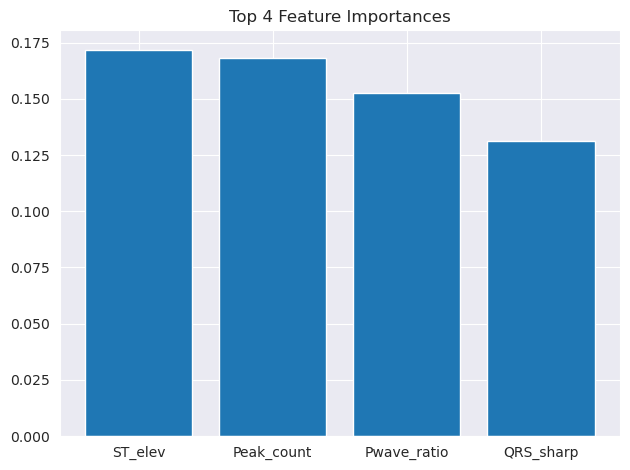

Ocena działania modelu: 

Zbalansowana dokładność klasyfikacji:  74.7856

🎯 Ocena: 0.0000 pkt

=== 📊 Classification Report ===
              precision    recall  f1-score   support

      normal       0.88      0.85      0.86       819
        afib       0.88      0.86      0.87       142
         pac       0.56      0.65      0.60       191
         pvc       0.58      0.59      0.58       197
st_elevation       0.81      0.79      0.80       151

    accuracy                           0.78      1500
   macro avg       0.74      0.75      0.74      1500
weighted avg       0.79      0.78      0.79      1500



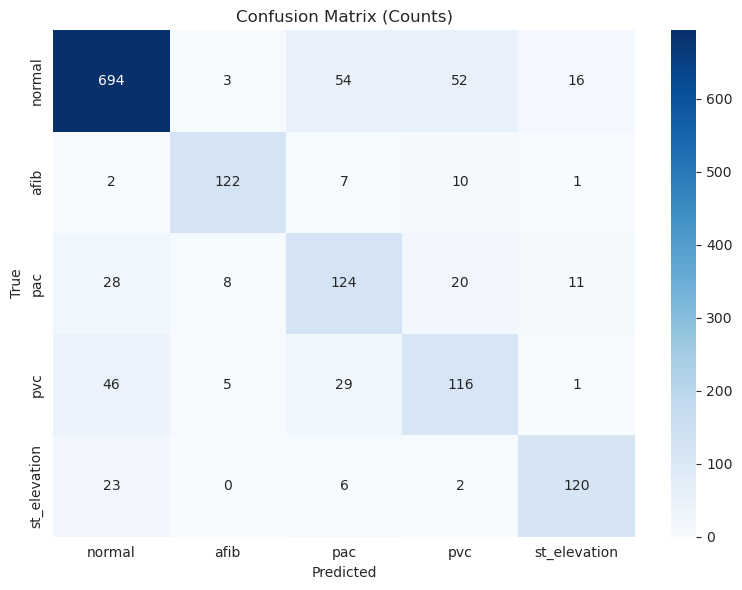

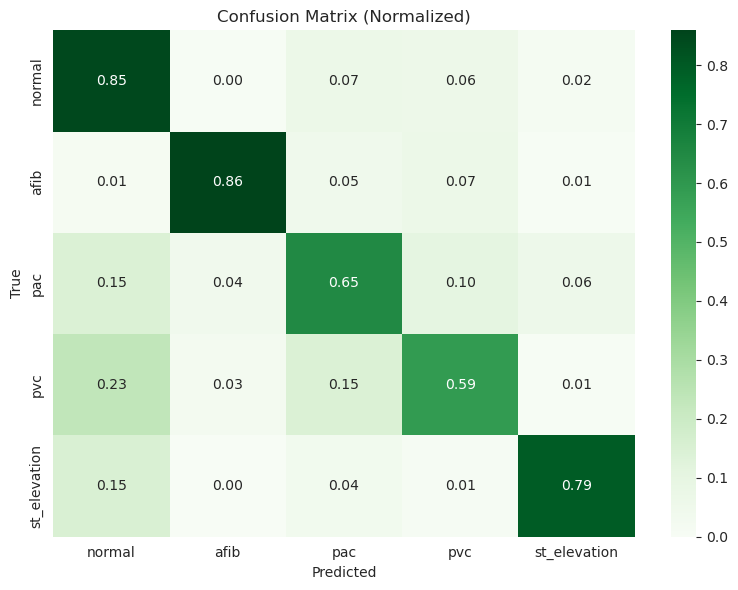


=== 🧮 Per-Class Accuracy and F1 Score ===
      normal: Accuracy = 0.85 | F1 = 0.86
        afib: Accuracy = 0.98 | F1 = 0.87
         pac: Accuracy = 0.89 | F1 = 0.60
         pvc: Accuracy = 0.89 | F1 = 0.58
st_elevation: Accuracy = 0.96 | F1 = 0.80


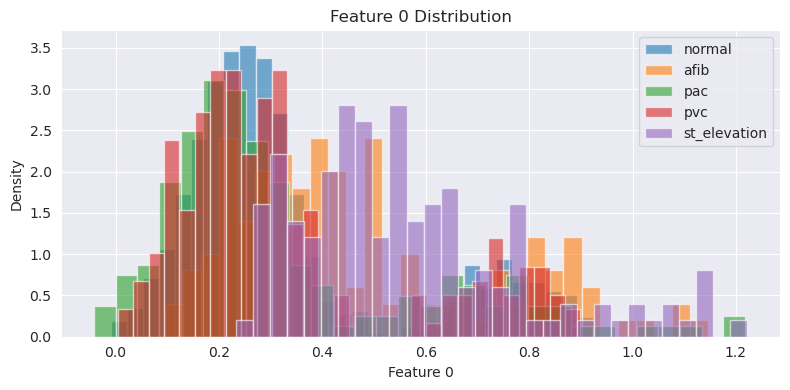

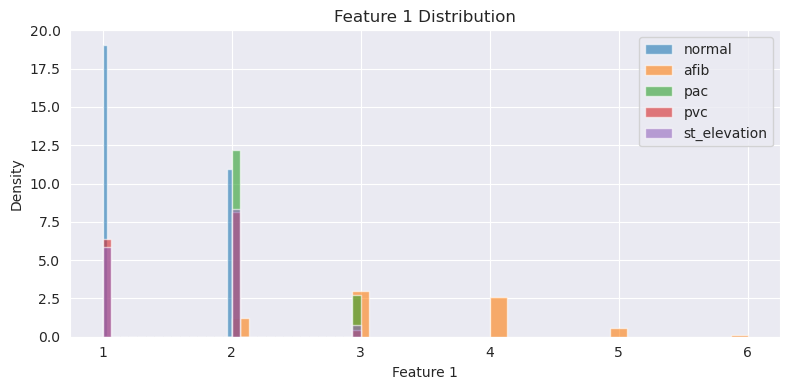

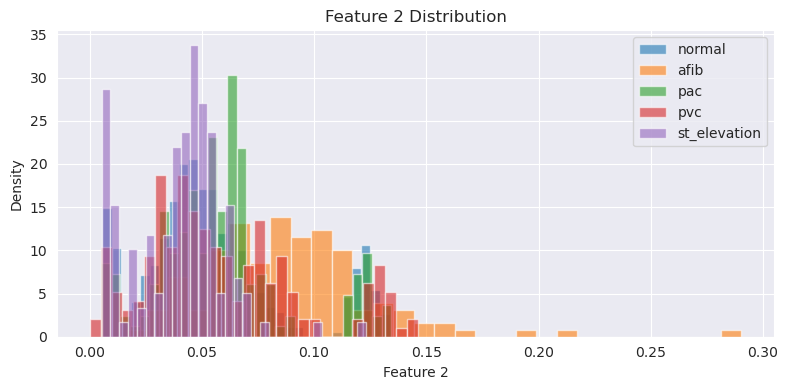

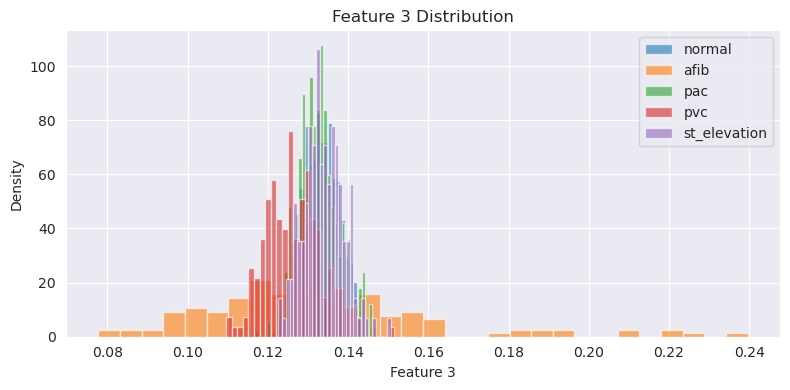

In [175]:
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    f1_score, accuracy_score
)
!pip install seabornfrom sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

if not FINAL_EVALUATION_MODE:
    exemplary_solution = ExemplarySolution.create_with_training()
    print(f"Ocena: {score_solution(exemplary_solution)} pkt")

    # Compute meta-features and predictions on validation set
    X_meta = exemplary_solution.compute_meta_features(x_valid)
    y_pred = exemplary_solution.random_forest.predict(X_meta)

    # Evaluation metrics
    print("\n=== Classification Report ===")
    print(classification_report(y_valid, y_pred, target_names=[
        "normal", "afib", "pac", "pvc", "st_elevation"
    ]))

    print("=== Confusion Matrix ===")
    cm = confusion_matrix(y_valid, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
        "normal", "afib", "pac", "pvc", "st_elevation"
    ])
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    # Plot how each feature separates the classes
plot_feature_distributions(X_meta, y_valid, class_names=[
    "normal", "afib", "pac", "pvc", "st_elevation"
])


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

if not FINAL_EVALUATION_MODE:
    # Train and predict
    exemplary_solution = ExemplarySolution.create_with_training()
    print(f"\n🎯 Ocena: {score_solution(exemplary_solution):.4f} pkt")

    X_meta = exemplary_solution.compute_meta_features(x_valid)
    y_pred = exemplary_solution.random_forest.predict(X_meta)

    class_labels = ["normal", "afib", "pac", "pvc", "st_elevation"]

    # === 📊 Classification Report ===
    print("\n=== 📊 Classification Report ===")
    report = classification_report(y_valid, y_pred, target_names=class_labels)
    print(report)

    # === 🔀 Confusion Matrix (Absolute + Normalized) ===
    cm = confusion_matrix(y_valid, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    ax.set_title("Confusion Matrix (Counts)")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
    ax.set_title("Confusion Matrix (Normalized)")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    plt.tight_layout()
    plt.show()

    # === 🧪 Per-class Accuracy & F1 ===
    print("\n=== 🧮 Per-Class Accuracy and F1 Score ===")
    for idx, label in enumerate(class_labels):
        true = y_valid == idx
        pred = y_pred == idx
        acc = accuracy_score(true, pred)
        f1 = f1_score(y_valid, y_pred, labels=[idx], average="macro")
        print(f"{label:>12}: Accuracy = {acc:.2f} | F1 = {f1:.2f}")

    # Optional: Save confusion matrix to file
    # fig.savefig("confusion_matrix_normalized.png")

    # === 📈 Feature Distributions ===
    plot_feature_distributions(X_meta, y_valid, class_names=class_labels)


# Twoje Rozwiązanie

W tej sekcji należy umieścić Twoje rozwiązanie. Wprowadzaj zmiany wyłącznie tutaj! XD

In [176]:
import numpy as np
from scipy.stats import skew, kurtosis

class YourSolution(ISolution):
    def compute_meta_features(self, x: np.ndarray) -> np.ndarray:
        """
        Wyznacza 4 cechy fizjologicznie związane z EKG:
        - Szczytowe wychylenie (max)
        - Głębokość najniższego punktu (min)
        - Rozstęp (peak-to-peak)
        - Odchylenie standardowe (zmienność sygnału)
        """
        max_vals = np.max(x, axis=1)
        min_vals = np.min(x, axis=1)
        ptp_vals = np.ptp(x, axis=1)
        std_vals = np.std(x, axis=1)
        
        return np.column_stack((max_vals, min_vals, ptp_vals, std_vals))

    @staticmethod
    def get_rf_hyperparameters() -> dict[str, int | float | str]:
        """
        Zgodne z ograniczeniami: maks. 10 drzew i głębokość maks. 10.
        """
        return {
            "n_estimators": 10,
            "max_depth": 10,
            "min_samples_split": 2,
            "min_samples_leaf": 1,
            "max_features": "sqrt",
            "bootstrap": True
        }


# Ewaluacja

Uruchomienie poniższej komórki pozwoli sprawdzić, ile punktów zdobyłoby Twoje rozwiązanie na danych walidacyjnych. Przed wysłaniem upewnij się, że cały notebook wykonuje się od początku do końca bez błędów i bez konieczności ingerencji użytkownika po wybraniu opcji "Run All".

Podczas sprawdzania model zostanie zapisany jako `your_model.pkl` i oceniony na zbiorze testowym.

In [177]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################
if FINAL_EVALUATION_MODE:
    your_solution = YourSolution.create_with_training()
    print(f"Ocena: {score_solution(your_solution)} pkt")

    OUTPUT_PATH = "file_output"
    FUNCTION_FILENAME = "your_solution"
    FUNCTION_OUTPUT_PATH = os.path.join(OUTPUT_PATH, FUNCTION_FILENAME)

    if not os.path.exists(OUTPUT_PATH):
        os.makedirs(OUTPUT_PATH)
    
    with open("file_output/your_model.pkl", "wb") as model_out:
        cloudpickle.dump(your_solution, model_out)